In [28]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

#Suppress FutureWarning related to use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

In [35]:
# Load the data
credit_card_fraud = pd.read_csv('credit_card_fraud.csv')

In [41]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(credit_card_fraud.head())

DataFrame Info:
  trans_date_trans_time                   merchant       category     amt  \
0   2019-01-01 00:00:44  Heller, Gutmann and Zieme    grocery_pos  107.23   
1   2019-01-01 00:00:51             Lind-Buckridge  entertainment  220.11   
2   2019-01-01 00:07:27                  Kiehn Inc    grocery_pos   96.29   
3   2019-01-01 00:09:03                Beier-Hyatt   shopping_pos    7.77   
4   2019-01-01 00:21:32                 Bruen-Yost       misc_pos    6.85   

                       city state      lat      long  city_pop  \
0                    Orient    WA  48.8878 -118.2105       149   
1                Malad City    ID  42.1808 -112.2620      4154   
2                   Grenada    CA  41.6125 -122.5258       589   
3  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
4                   Freedom    WY  43.0172 -111.0292       471   

                                 job         dob  \
0  Special educational needs teacher  1978-06-21   
1        Nature cons

In [39]:
# Check for the presence of infinite values in numerical columns
infinite_mask = np.isinf(credit_card_fraud.select_dtypes(include=[np.number]))
has_infinite_values = infinite_mask.any()

# Display columns + rows with infinite values:
if has_infinite_values.any():
    print("\nColumns with Infinite Values:") # Display columns
    print(credit_card_fraud.columns[has_infinite_values])
    print("\nRows with Infinite Values:") # Display rows
    print(credit_card_fraud[credit_card_fraud.columns[has_infinite_values]].loc
          [infinite_mask.any(axis=1)])

# Replace infinite values with NaN
credit_card_fraud.replace([np.inf, -np.inf], np.nan, inplace=True)

# Verify that infinite values are replaced with NaN
print("\nDataFrame Info after Handling Infinite Values:")
print(credit_card_fraud.info())


DataFrame Info after Handling Infinite Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  f

## Univariate Analysis

### Numerical Variables
1. Explore the distribution of transaction amount (`amt`).
2. Analyze the geographical coordinates (`lat`, `long`, `merch_lat`, `merch_long`).
3. Investigate the distribution of city population (`city_pop`).

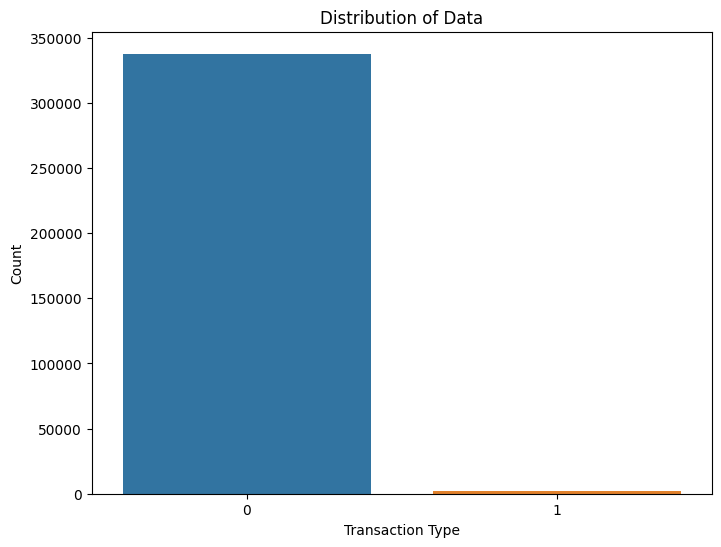

In [30]:
# Univariate Analysis
plt.figure(figsize=(8,6))
sns.countplot(x='is_fraud', data=credit_card_fraud)
plt.title('Distribution of Data')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

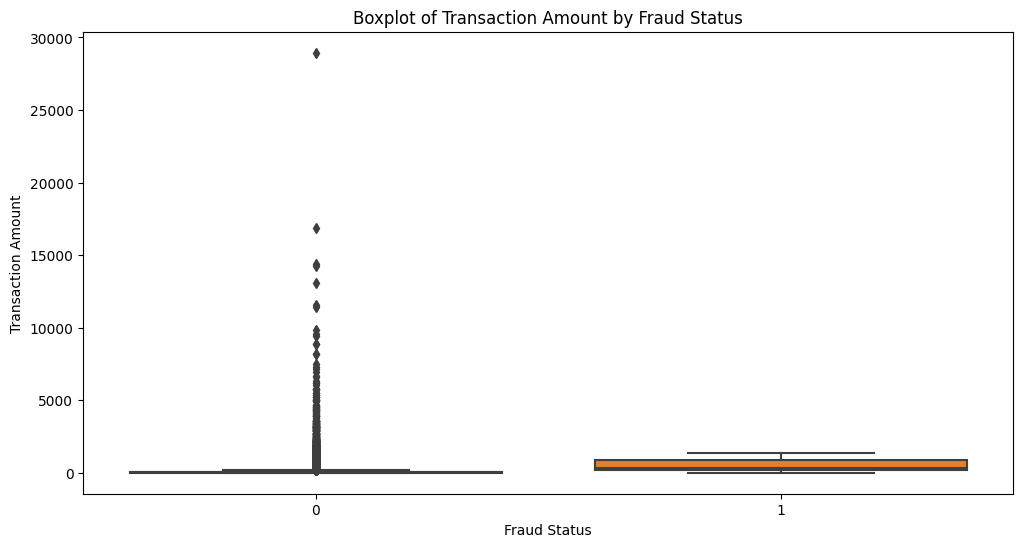

In [31]:
# Explore distribution of transaction amount (`amt`)
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=credit_card_fraud)
plt.title('Boxplot of Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.show()

C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

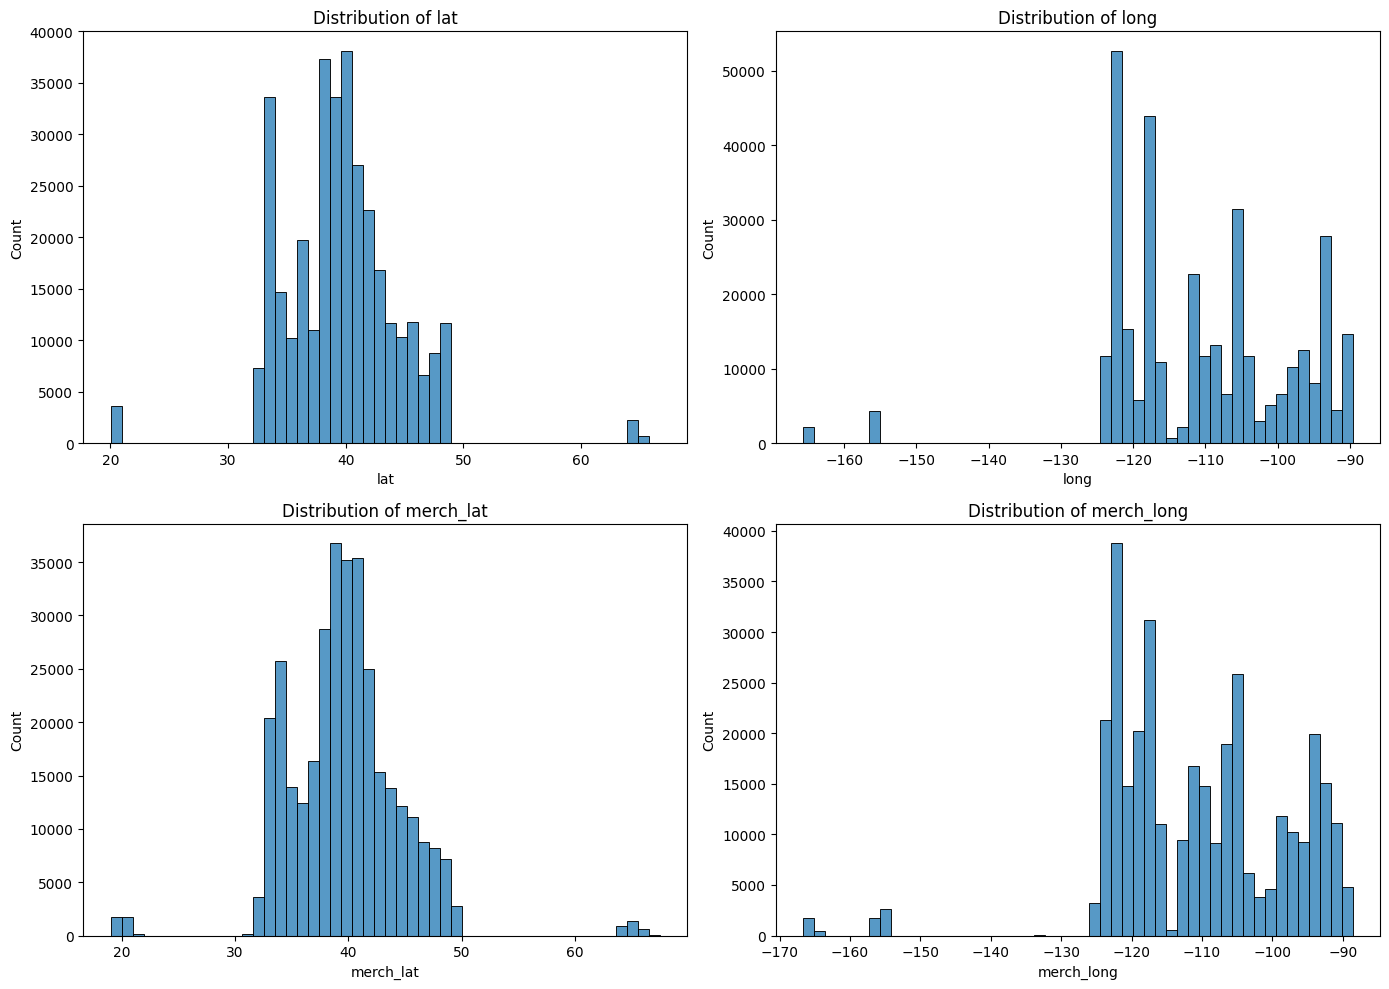

In [40]:
# Analyze geographical coordinates
geo_cols = ['lat', 'long', 'merch_lat', 'merch_long']

plt.figure(figsize=(14, 10))
for i, col in enumerate(geo_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(credit_card_fraud[col], bins=50, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


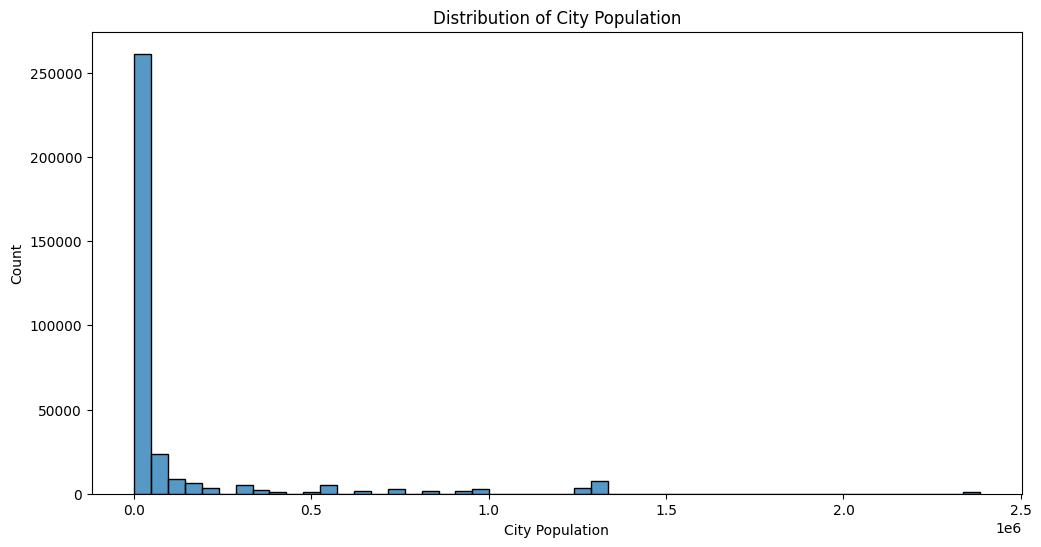

In [33]:
# Investigate the distribution of city population
plt.figure(figsize=(12, 6))
sns.histplot(credit_card_fraud['city_pop'], bins=50, kde=False)
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.show()